In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
import joblib

In [ ]:
df = pd.read_csv('diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.fillna({'Glucose': df['Glucose'].mean()}, inplace=True)
df.fillna({'BloodPressure': df['BloodPressure'].mean()}, inplace=True)
df.fillna({'SkinThickness': df['SkinThickness'].median()}, inplace=True)
df.fillna({'Insulin': df['Insulin'].median()}, inplace=True)
df.fillna({'BMI': df['BMI'].mean()}, inplace=True)

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping outliers
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

display(df.describe())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.837240,121.136230,70.684896,20.511719,73.652669,32.125065,0.458914,33.199870,0.348958
std,3.344157,31.187468,14.197239,15.844744,93.576029,7.049584,0.285596,11.628404,0.476951
min,0.000000,37.125000,35.000000,0.000000,0.000000,13.350000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,13.500000,199.000000,107.000000,80.000000,318.125000,50.550000,1.200000,66.500000,1.000000


In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate IQR
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = {}
for col in numerical_cols:
    outliers[col] = df[(df[col] < lower_bound[col]) | (df[col] > upper_bound[col])][col]

# Print the number of outliers per column
for col, outlier_series in outliers.items():
    print(f"Number of outliers in {col}: {len(outlier_series)}")

Number of outliers in Pregnancies: 0
Number of outliers in Glucose: 0
Number of outliers in BloodPressure: 0
Number of outliers in SkinThickness: 0
Number of outliers in Insulin: 0
Number of outliers in BMI: 0
Number of outliers in DiabetesPedigreeFunction: 0
Number of outliers in Age: 0
Number of outliers in Outcome: 0


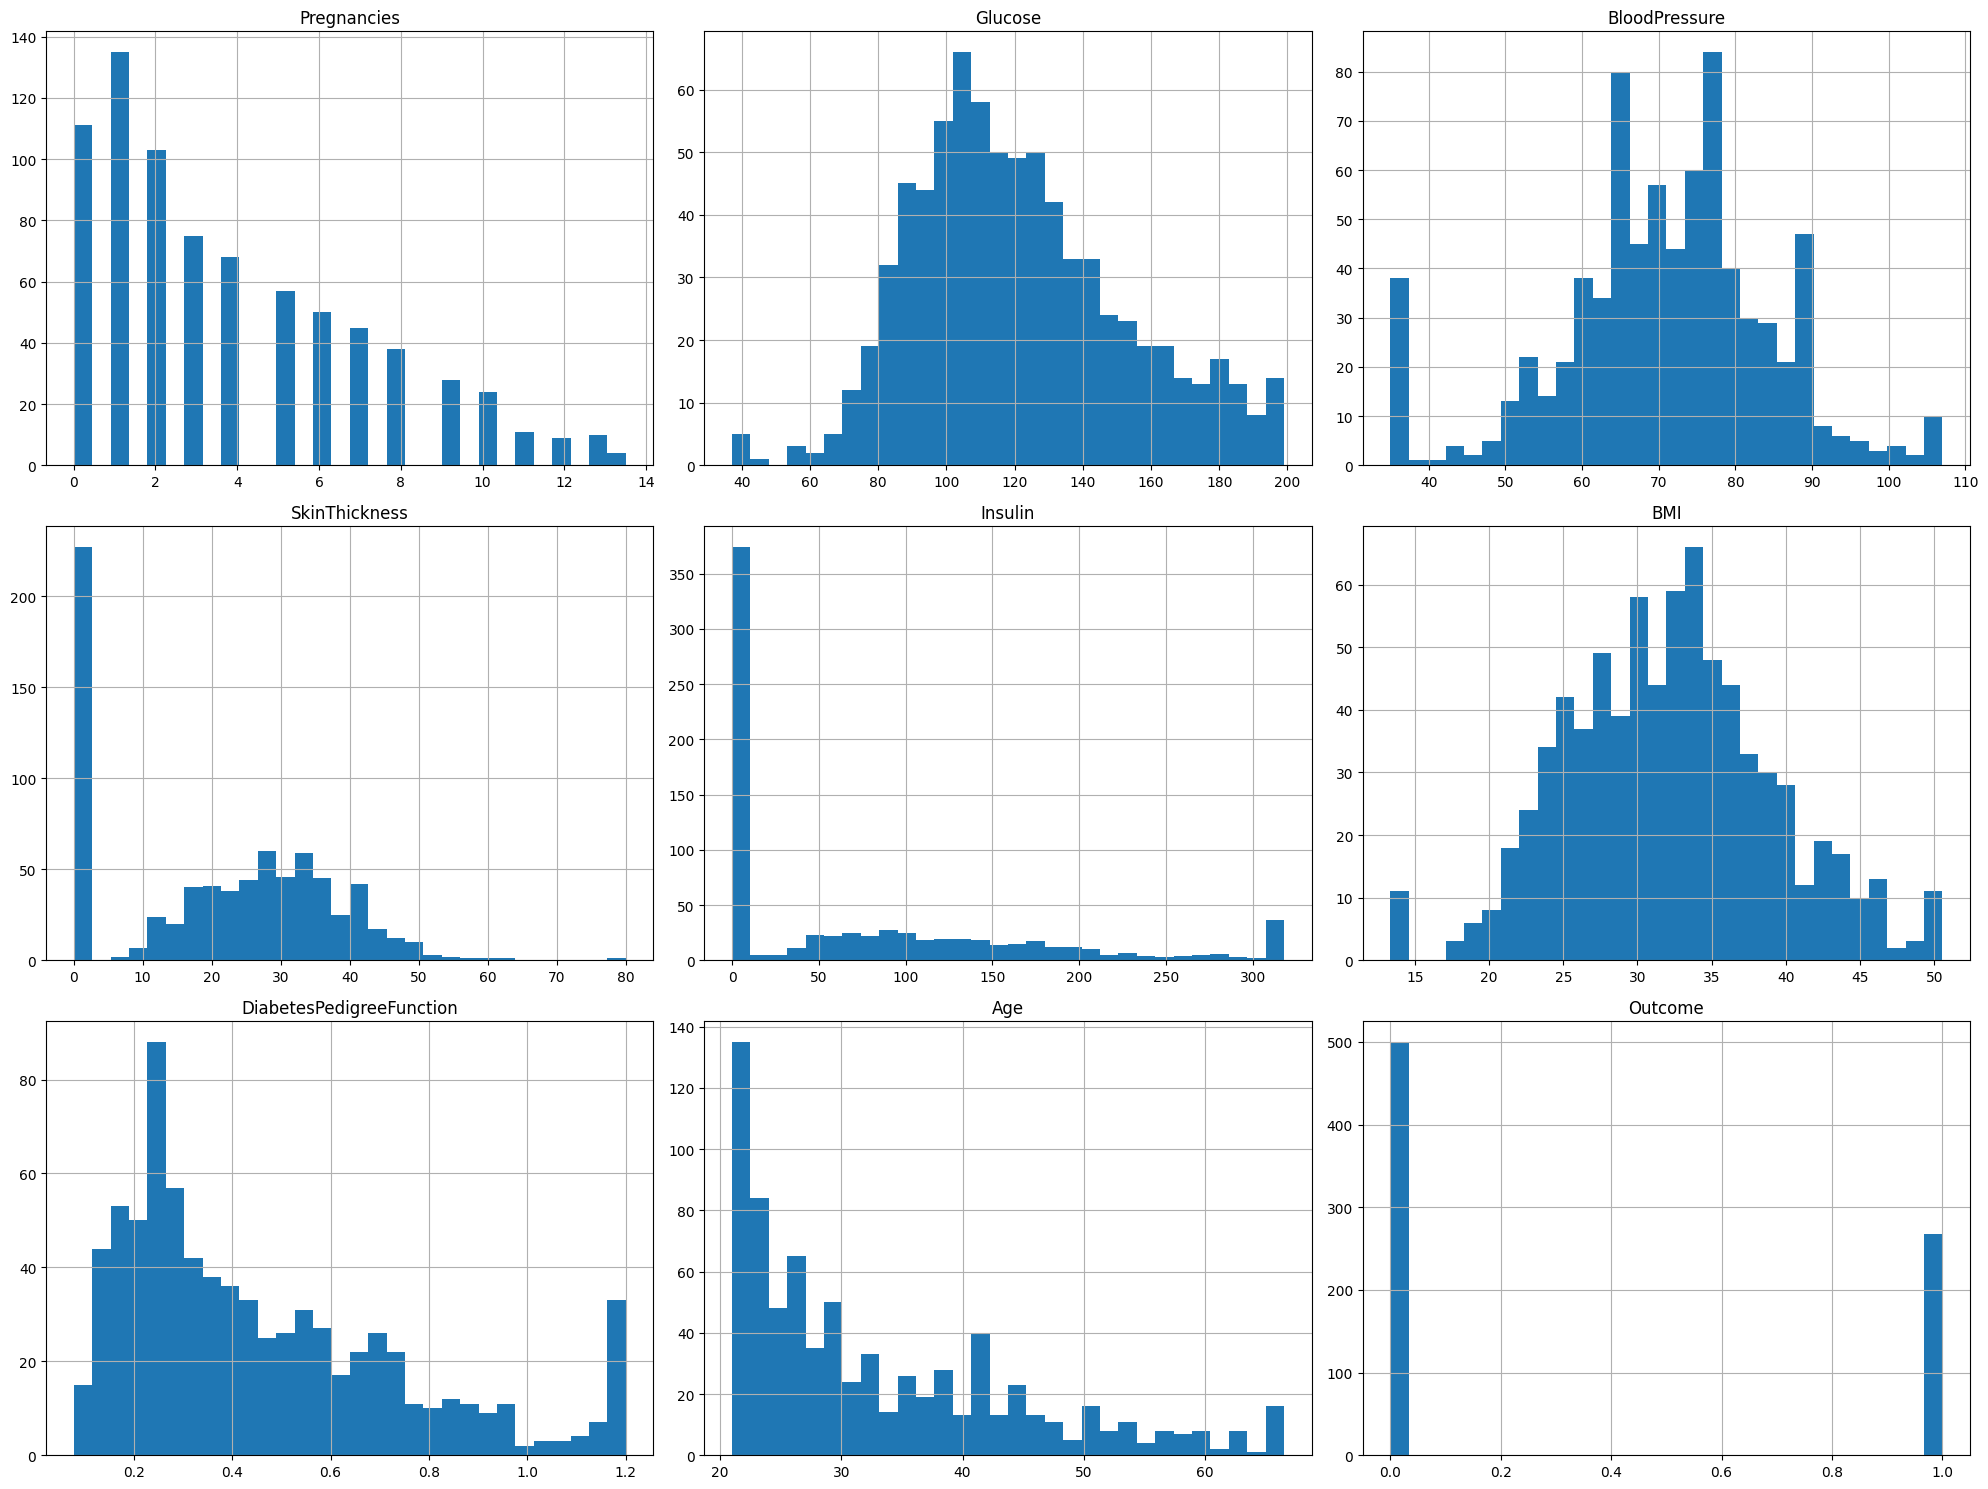

In [ ]:
# Select only the numerical columns for plotting
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for numerical columns
df[numerical_cols].hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

In [ ]:
num_cols = ['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.647150,0.861926,0.092691,0.914986,-0.787602,0.209359,0.588927,1.445691,1.0
1,-0.848970,-1.159433,-0.330201,0.536065,-0.787602,-0.784254,-0.378101,-0.189304,0.0
2,1.245598,1.984903,-0.471166,-1.295388,-0.787602,-1.252672,0.746595,-0.103252,1.0
3,-0.848970,-1.031093,-0.330201,0.157144,0.217583,-0.571337,-1.022787,-1.049828,0.0
4,-1.148194,0.508990,-2.162737,0.914986,1.008900,1.557835,2.596563,-0.017199,1.0


In [ ]:
df_copy = df.copy()
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,-0.549746,-1.191518,-2.515148,-1.295388,-0.787602,-2.665023,-0.542777,-1.049828
618,1.544821,-0.293136,0.797513,0.220297,-0.787602,-0.557143,2.596563,1.445691
346,-0.848970,0.573160,-1.739844,-0.095470,0.099955,-0.486170,0.683528,-0.963775
294,-1.148194,1.279031,-1.457916,-1.295388,-0.787602,-1.451395,-0.717963,2.736476
231,0.647150,0.412735,0.656548,1.041293,2.614256,1.997864,-0.774023,1.101481


Logistic Regression Accuracy: 0.7532467532467533
Confusion Matrix:
 [[80 19]
 [19 36]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.81      0.81        99
         1.0       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



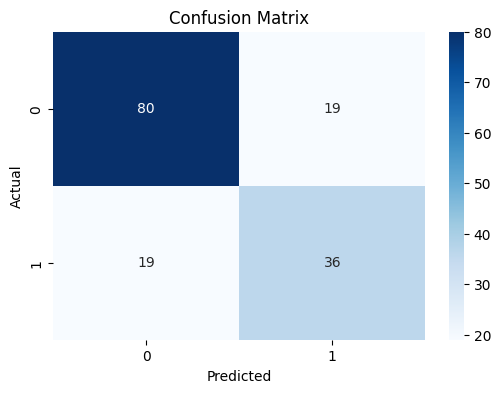

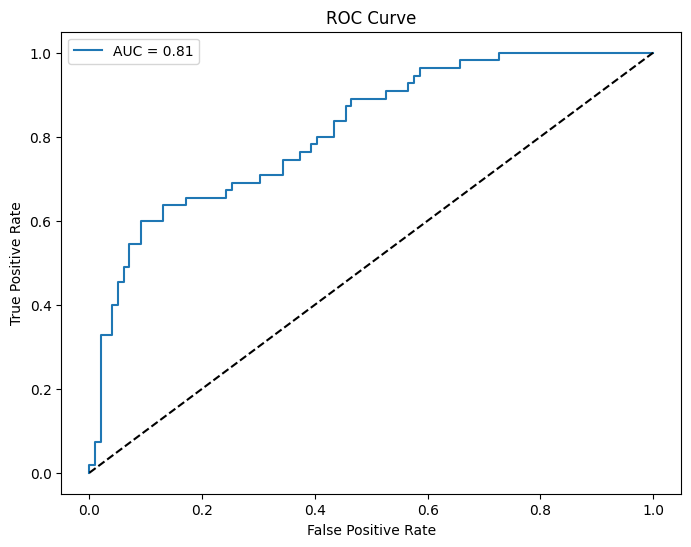

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

print(f"Logistic Regression Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Add ROC curve
y_pred_prob = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Store results
results = {} # Initialize results dictionary
results['Logistic Regression'] = {'Accuracy': accuracy, 'AUC': auc, 'Precision': report['1.0']['precision'], 'Recall': report['1.0']['recall'], 'F1-score': report['1.0']['f1-score']}

K-Nearest Neighbors Accuracy: 0.7272727272727273
Confusion Matrix:
 [[82 17]
 [25 30]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.83      0.80        99
         1.0       0.64      0.55      0.59        55

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.72      0.73      0.72       154



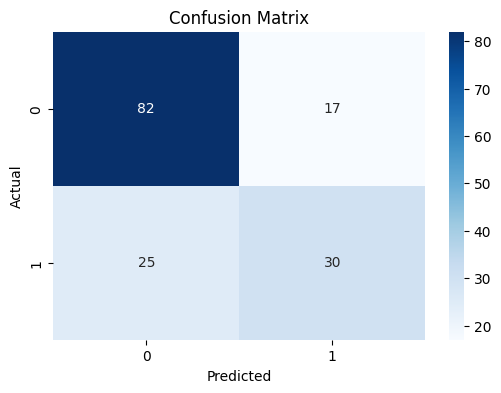

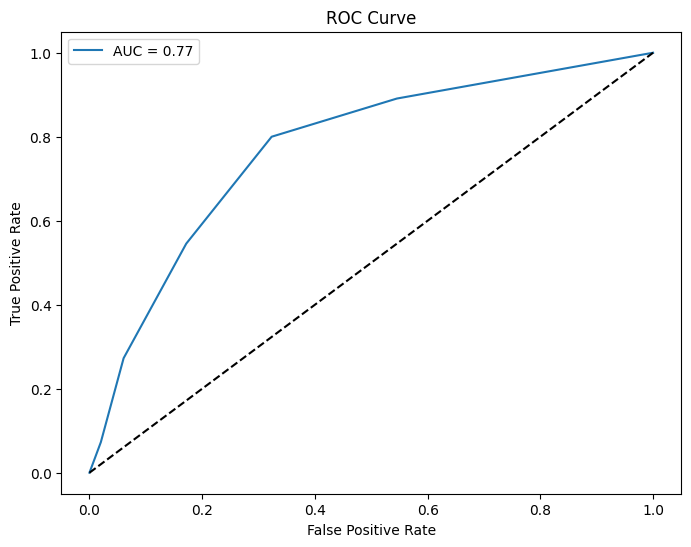

In [ ]:
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
y_pred = kn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

print(f"K-Nearest Neighbors Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Add ROC curve
y_pred_prob = kn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Store results
results['K-Nearest Neighbors'] = {'Accuracy': accuracy, 'AUC': auc, 'Precision': report['1.0']['precision'], 'Recall': report['1.0']['recall'], 'F1-score': report['1.0']['f1-score']}

Gaussian Naive Bayes Accuracy: 0.7402597402597403
Confusion Matrix:
 [[75 24]
 [16 39]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.76      0.79        99
         1.0       0.62      0.71      0.66        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.74      0.74       154



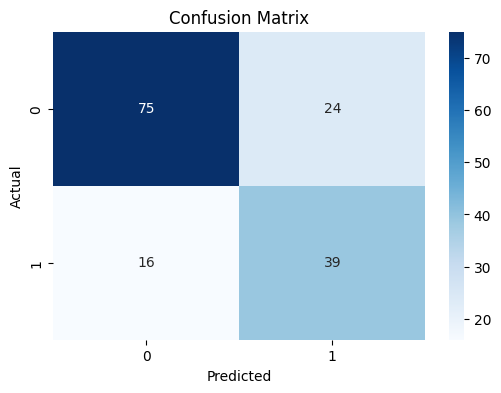

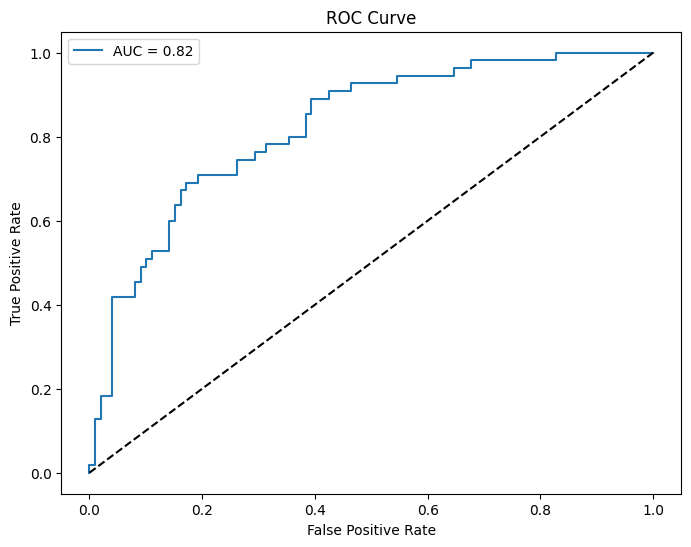

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

print(f"Gaussian Naive Bayes Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Add ROC curve
y_pred_prob = nb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Store results
results['Gaussian Naive Bayes'] = {'Accuracy': accuracy, 'AUC': auc, 'Precision': report['1.0']['precision'], 'Recall': report['1.0']['recall'], 'F1-score': report['1.0']['f1-score']}

Decision Tree Accuracy: 0.7272727272727273
Confusion Matrix:
 [[77 22]
 [20 35]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.78      0.79        99
         1.0       0.61      0.64      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



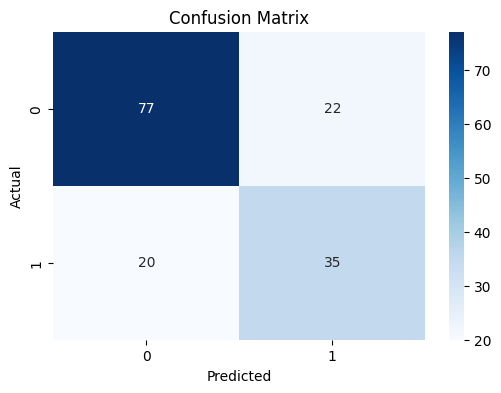

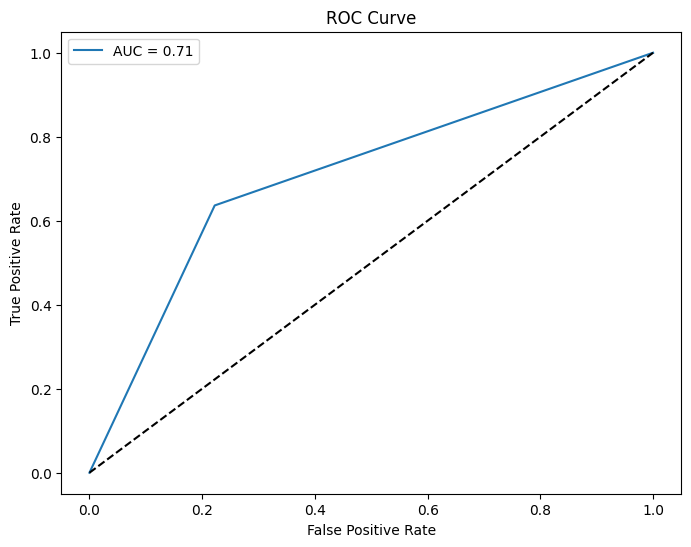

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

print(f"Decision Tree Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Add ROC curve
y_pred_prob = dt.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Store results
results['Decision Tree'] = {'Accuracy': accuracy, 'AUC': auc, 'Precision': report['1.0']['precision'], 'Recall': report['1.0']['recall'], 'F1-score': report['1.0']['f1-score']}

Random Forest Accuracy: 0.7467532467532467
Confusion Matrix:
 [[78 21]
 [18 37]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.79      0.80        99
         1.0       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



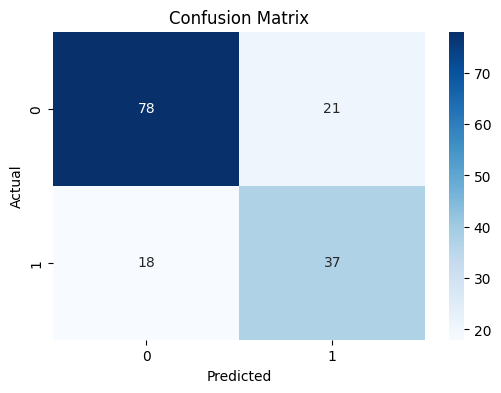

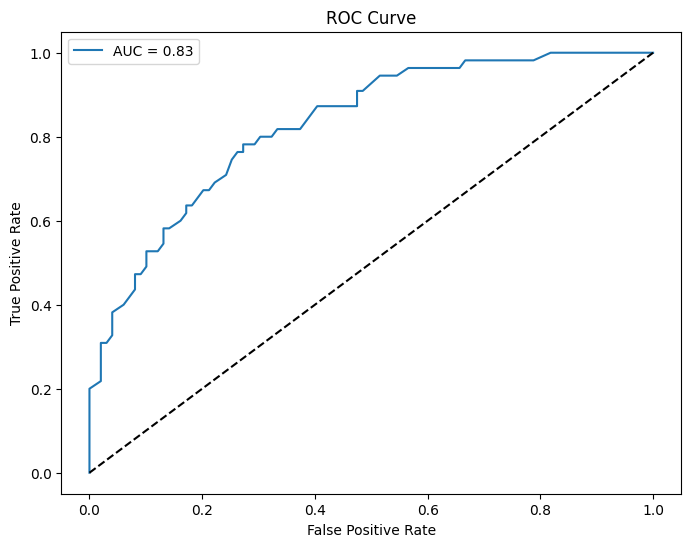

In [ ]:
rt = RandomForestClassifier()
rt.fit(X_train, y_train)
y_pred = rt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

print(f"Random Forest Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Add ROC curve
y_pred_prob = rt.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Store results
results['Random Forest'] = {'Accuracy': accuracy, 'AUC': auc, 'Precision': report['1.0']['precision'], 'Recall': report['1.0']['recall'], 'F1-score': report['1.0']['f1-score']}

Support Vector Machine Accuracy: 0.7207792207792207
Confusion Matrix:
 [[79 20]
 [23 32]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.80      0.79        99
         1.0       0.62      0.58      0.60        55

    accuracy                           0.72       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154



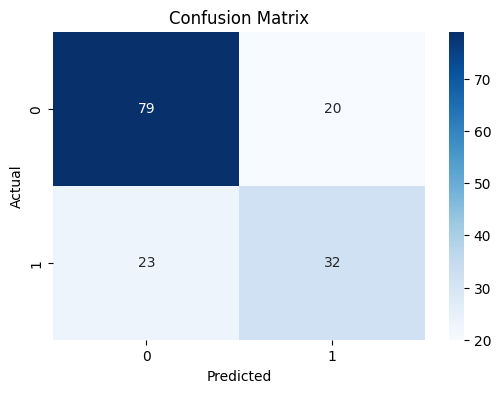

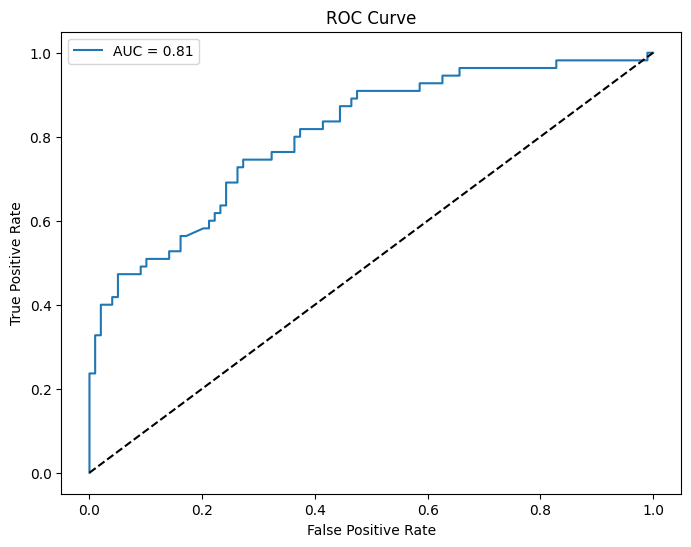

In [ ]:
sv = SVC(probability=True)
sv.fit(X_train, y_train)
y_pred = sv.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

print(f"Support Vector Machine Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Add ROC curve
y_pred_prob = sv.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Store results
results['Support Vector Machine'] = {'Accuracy': accuracy, 'AUC': auc, 'Precision': report['1.0']['precision'], 'Recall': report['1.0']['recall'], 'F1-score': report['1.0']['f1-score']}

In [ ]:
results_df = pd.DataFrame(results).T
display(results_df)

,Accuracy,AUC,Precision,Recall,F1-score
Logistic Regression,0.753247,0.814509,0.654545,0.654545,0.654545
K-Nearest Neighbors,0.727273,0.772727,0.638298,0.545455,0.588235
Gaussian Naive Bayes,0.740260,0.822406,0.619048,0.709091,0.661017
Decision Tree,0.727273,0.707071,0.614035,0.636364,0.625000
Random Forest,0.746753,0.828742,0.637931,0.672727,0.654867
Support Vector Machine,0.720779,0.805234,0.615385,0.581818,0.598131


In [ ]:
joblib.dump((lr, scaler, X.columns.tolist()), "/content/diabetes_lr.pkl")
print("Model saved successfully!")

Model saved successfully!
